In [1]:
# in this notebook, I try to add each surface step by step, I think it is also beneficial to model the powell lens

In [ ]:
# import the necessary packages and set the material dictionary for the lens
%pylab inline
import os
import pyoptic2 as pyo
from pyoptic2.util import zemax, read_agf
from pyoptic2.display import plot2d, plot_system2d
import pandas as pd
from pyoptic2 import material
# get the current path
mysetup_dir = os.getcwd()
# define the .zar file name
zar_file_name1 = 'AC254_100_A_Zemax.zar'
zar_file_name2 = 'LJ1567L1_Zemax.zar'
# combine the directory and the file name
zar_file_path1 = os.path.join(mysetup_dir, zar_file_name1)
print(zar_file_path1)
zar_file_path2 = os.path.join(mysetup_dir, zar_file_name2)
print(zar_file_path2)
# read .zar file
AC254_100_A = zemax.read_cached_zar(zar_file_path1)
LJ1567L1= zemax.read_cached_zar(zar_file_path2)

# add materials
air = material.Material(material.Material.REFRACT, 1.0)
# add zemax glasses
glasses = zemax.readZar(zar_file_path2)[1] # Get F_SILICA glass from LJ1567L1_Zemax.zar
# build a dictionary of glasses and convert the zemax data to glass dictionary
lens_glasses = {}
for i in glasses.keys():
    glass_data = glasses.get(i, None)
    g = zemax.Glass(glass_data)
    lens_glasses[i] = g
        
lens_glasses['air'] = air
print(lens_glasses['F_SILICA'].__dict__)

Populating the interactive namespace from numpy and matplotlib
c:\localfiles\pyoptic2\mysetup\AC254_100_A_Zemax.zar
c:\localfiles\pyoptic2\mysetup\LJ1567L1_Zemax.zar
detected 12 sections
{'type': 2, 'data': {'name': 'F_SILICA', 'catalog': None, 'dispform': 2, 'nd': 1.458464, 'vd': 67.821433, 'status': 0, 'tce': 0.51, 'density': 2.2, 'dpgf': 0.0, 'cd': [0.6961663, 0.004679148, 0.4079426, 0.013512063, 0.8974794, 97.9340025, 0.0, 0.0, 0.0, 0.0], 'td': [2.237e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0], 'od': [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0], 'ld': [0.21, 3.71]}, 'ns': {}}


In [ ]:
# create a new light source
src = pyo.ColimatedSource('light source', pyo.Placement([0,0,0], [0,1,0]), diameter=2.0, color=(1,0,0), wavelength=488.
)
r = src.principle_ray #get the on-axis ray from the light source

# generate the system (basically just a container for surfaces)
s = pyo.System()


In [ ]:
# add surfaces
# placement orientation is [x,y,z], y is the optical axis

s.append(pyo.PlaneSurface(
    name= 'source plane',
    dimension=np.ones(3) * 5.,
    placement=pyo.Placement([0,0,0], [0,1,0]),
    material=lens_glasses['F_SILICA'],
))

# ?why does it always uses previous surface material??????????????

s.append(pyo.CylindricalSurface(
    name='cylindrical lens',
    dimension=np.ones(3) * 5., # radius of the lens
    placement=pyo.Placement([0,20,0], [0,1,0]),
    curvature_radius=-46,
    curvature_axis=[0, 0, 1], # the orientation of the bending
    material=lens_glasses['air'],     
))
# s.append(pyo.PlaneSurface(
#     name= 'cylindrical lens',
#     dimension=np.ones(3) * 5.,
#     placement=pyo.Placement([0, 25.10, 0], [0, 1, 0]),
#     material=lens_glasses['air'],
# ))

s.append(pyo.ThinLens(
    name='lens',
    dimension=np.ones(3) * 5.,
    placement=pyo.Placement([0, 170, 0], [0, 1, 0]),
    focal_length=50,
    material=lens_glasses['air'],
))

s.append(pyo.SphericalSurface(
    name='powell lens',
    dimension=np.ones(3) * 2.,
    placement=pyo.Placement([0, 220, 0], [0, 1, 0]),
    curvature_radius=-
))

s.append(pyo.PlaneSurface(
    name= 'detector',
    dimension=np.ones(3) * 5.,
    placement=pyo.Placement([0, 220, 0], [0, 1, 0]),
    material=lens_glasses['air'],
))


# cam, r = s.add(pyo.Mirror(r.prop(100), name='Camera'), r)




In [5]:
print(lens_glasses)

{'F2': <pyoptic2.util.zemax.Glass object at 0x000002034BF13F88>, 'F5': <pyoptic2.util.zemax.Glass object at 0x000002034BE644C8>, 'K10': <pyoptic2.util.zemax.Glass object at 0x000002034EF67088>, 'K7': <pyoptic2.util.zemax.Glass object at 0x000002034EF9EE08>, 'KZFS12': <pyoptic2.util.zemax.Glass object at 0x000002034CF94BC8>, 'KZFSN5': <pyoptic2.util.zemax.Glass object at 0x000002034EAF6508>, 'LAFN7': <pyoptic2.util.zemax.Glass object at 0x000002034EAF6E88>, 'LF5': <pyoptic2.util.zemax.Glass object at 0x000002034EAF62C8>, 'LLF1': <pyoptic2.util.zemax.Glass object at 0x000002034D00FD48>, 'N-BAF10': <pyoptic2.util.zemax.Glass object at 0x000002034D00FD88>, 'N-BAF4': <pyoptic2.util.zemax.Glass object at 0x000002034D00FE88>, 'N-BAF51': <pyoptic2.util.zemax.Glass object at 0x000002034D00FEC8>, 'N-BAF52': <pyoptic2.util.zemax.Glass object at 0x000002034D00FF08>, 'N-BAK1': <pyoptic2.util.zemax.Glass object at 0x000002034D00FF48>, 'N-BAK2': <pyoptic2.util.zemax.Glass object at 0x000002034D00FF88

In [6]:
# figure(figsize=(18,5))
# plot_system2d(s, 'zy') #plot the system
# plot2d(s.propagate(src.chief_rays), 'zy') #plot the on-axis, and extreme rays
# #plot2d(s.propagate(src.pupil_rays), 'xy') #plot rays evenly distributed across the pupil
# axis('equal')
# grid()

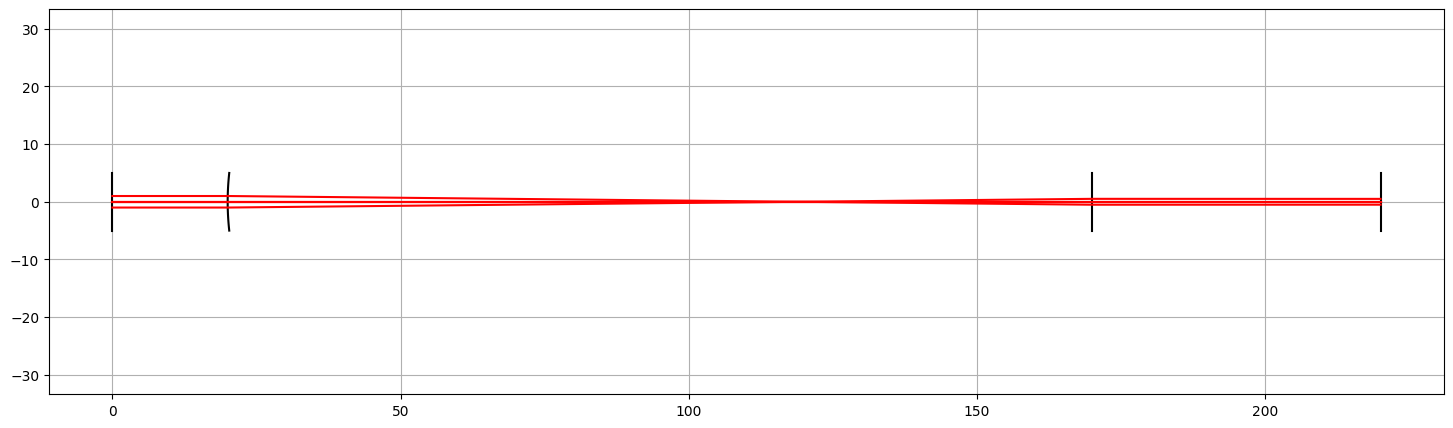

In [ ]:
# plot the 2d system
figure(figsize=(18,5))
plot_system2d(s, 'xy')
plot2d(s.propagate(src.chief_rays), 'xy')
axis('equal')
grid()